In [1]:
%matplotlib inline
import numpy as np
import torch
from IPython import display
from mpl_toolkits import mplot3d
from d2l import torch as d2l

In [2]:
def f(x, y):
  return torch.log(torch.exp(x) + torch.exp(y))

def grad_f(x, y):
  return torch.tensor([torch.exp(x) / (torch.exp(x) + torch.exp(y)),
          torch.exp(y) / (torch.exp(x) + torch.exp(y))])

epsilon = torch.tensor([0.01, -0.03])
grad_approx = f(torch.tensor([0.]), torch.log(
  torch.tensor([2.]))) + epsilon.dot(
  grad_f(torch.tensor([0.]), torch.log(torch.tensor(2.))))
  
true_value = f(torch.tensor([0.]) + epsilon[0], torch.log(
  torch.tensor([2.])) + epsilon[1])
f'approximation: {grad_approx}, true Value: {true_value}'


'approximation: tensor([1.0819]), true Value: tensor([1.0821])'

d:\Documents\anaconda\envs\torch_gpu\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\Admin\AppData\Local\Temp\ipykernel_7864\2409030766.py:20: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


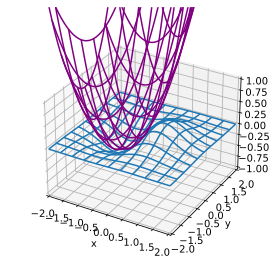

In [3]:
# Construct grid and compute function
x, y = torch.meshgrid(torch.linspace(-2, 2, 101),
                      torch.linspace(-2, 2, 101))
z = x*torch.exp(- x**2 - y**2)
# Compute approximating quadratic with gradient and Hessian at (1, 0)
w = torch.exp(torch.tensor([-1.]))*(-1 - (x + 1) + 2 * (x + 1)**2 + 2 * y**2)
# Plot function
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x.numpy(), y.numpy(), z.numpy(),
                  **{'rstride': 10, 'cstride': 10})
ax.plot_wireframe(x.numpy(), y.numpy(), w.numpy(),
                  **{'rstride': 10, 'cstride': 10}, color='purple')

d2l.plt.xlabel('x')
d2l.plt.ylabel('y')
d2l.set_figsize()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-1, 1)
ax.dist = 12